In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# load data and set options
# dataset from: https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction?resource=download
# with open('data/AIDS_Classification.csv') as f:
# set categorical data types
df = pd.read_csv('data/AIDS_Classification.csv', dtype={'hemo': 'category', 'homo': 'category', 'drugs': 'category', 'trt': 'category', 'oprior': 'category', 'z30': 'category', 'gender': 'category', 'str2': 'category', 'strat': 'category', 'symptom': 'category', 'treat': 'category', 'offtrt': 'category', 'infected': 'category'})

# set option for displaying all columns
pd.set_option('display.max_columns', None)

In [13]:

# drop race column -> us dataset 
df = df.drop(columns='race')

In [14]:
# basic infos on dataset
len(df), df.columns, df.shape

(2139,
 Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
        'oprior', 'z30', 'preanti', 'gender', 'str2', 'strat', 'symptom',
        'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820', 'infected'],
       dtype='object'),
 (2139, 22))

In [15]:
# lookup on first dataset lines
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,895,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,707,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1399,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1352,1,1,3,0,0,0,504,353,870,782,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   time      2139 non-null   int64   
 1   trt       2139 non-null   category
 2   age       2139 non-null   int64   
 3   wtkg      2139 non-null   float64 
 4   hemo      2139 non-null   category
 5   homo      2139 non-null   category
 6   drugs     2139 non-null   category
 7   karnof    2139 non-null   int64   
 8   oprior    2139 non-null   category
 9   z30       2139 non-null   category
 10  preanti   2139 non-null   int64   
 11  gender    2139 non-null   category
 12  str2      2139 non-null   category
 13  strat     2139 non-null   category
 14  symptom   2139 non-null   category
 15  treat     2139 non-null   category
 16  offtrt    2139 non-null   category
 17  cd40      2139 non-null   int64   
 18  cd420     2139 non-null   int64   
 19  cd80      2139 non-null   int64   
 20  cd820   

In [20]:
# look for uniques values on categories
df.describe(include='category')

,trt,hemo,homo,drugs,oprior,z30,gender,str2,strat,symptom,treat,offtrt,infected
count,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139
unique,4,2,2,2,2,2,2,2,3,2,2,2,2
top,3,0,1,0,0,1,1,1,1,0,1,0,0
freq,561,1959,1414,1858,2092,1177,1771,1253,886,1769,1607,1363,1618


In [18]:
df.describe()

,time,age,wtkg,karnof,preanti,cd40,cd420,cd80,cd820
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,35.248247,75.125311,95.446470,379.175783,350.501169,371.307153,986.627396,935.369799
std,292.274324,8.709026,13.263164,5.900985,468.657526,118.573863,144.634909,480.197750,444.976051
min,14.000000,12.000000,31.000000,70.000000,0.000000,0.000000,49.000000,40.000000,124.000000
25%,727.000000,29.000000,66.679200,90.000000,0.000000,263.500000,269.000000,654.000000,631.500000
50%,997.000000,34.000000,74.390400,100.000000,142.000000,340.000000,353.000000,893.000000,865.000000
75%,1091.000000,40.000000,82.555200,100.000000,739.500000,423.000000,460.000000,1207.000000,1146.500000
max,1231.000000,70.000000,159.939360,100.000000,2851.000000,1199.000000,1119.000000,5011.000000,6035.000000


In [38]:
# function to plot a variable on 2 plots 1 for infected subjects, 1 for non-infected
# df: pandas dataframe
# v: column to plot
# num: is the colonn a number ?
# bins: for numb, the number of bins
def plot_by_infected(df, v, num=False, bins=10):
    
    unique_infected_values = df['infected'].unique()

    fig, axs = plt.subplots(1, len(unique_infected_values), figsize=(12, 4))
    for i, value in enumerate(unique_infected_values):

        # Filter DataFrame for the current 'infected' value
        filtered_df = df[df['infected'] == value]
        if num:
            filtered_df[v].plot(kind='hist', ax=axs[i], bins=bins)
        else:
        # Count occurrences of each category in the filtered DataFrame
            category_counts = filtered_df[v].value_counts()
            # Plot the data
            category_counts.plot(kind='bar',ax=axs[i])

        axs[i].set_xlabel(v)
        axs[i].set_title(f'Count of {v} for infected={value}')
    
    plt.tight_layout()
    plt.show()
    

In [ ]:
df

<Axes: xlabel='infected'>

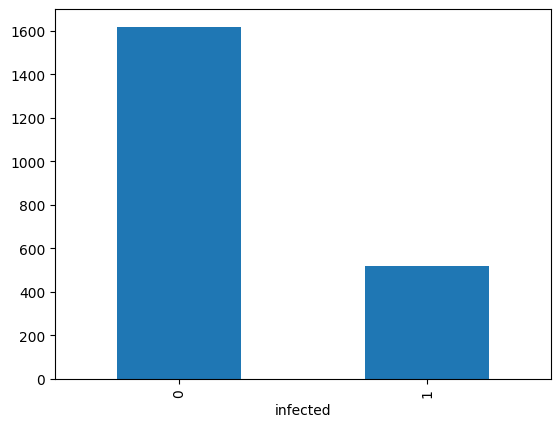

In [22]:
df['infected'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

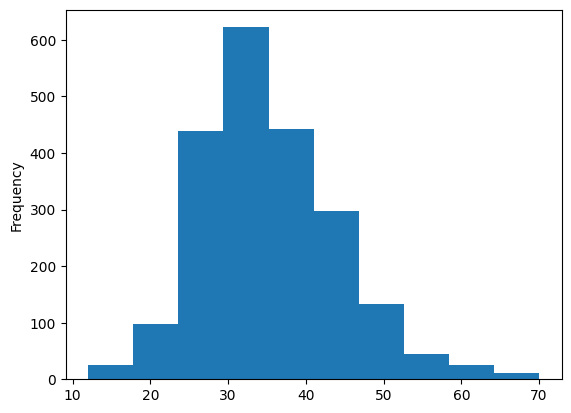

In [24]:
df['age'].plot(kind='hist', title='age')

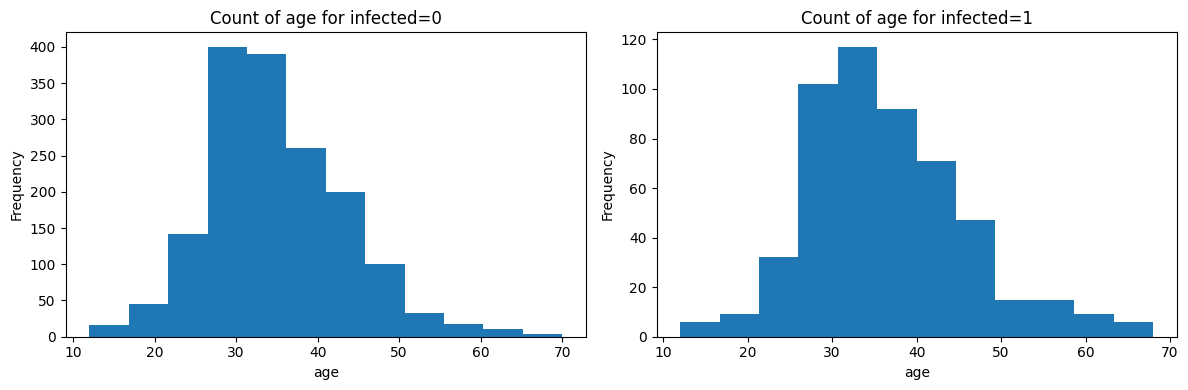

In [47]:
plot_by_infected(df, 'age', True, 12)

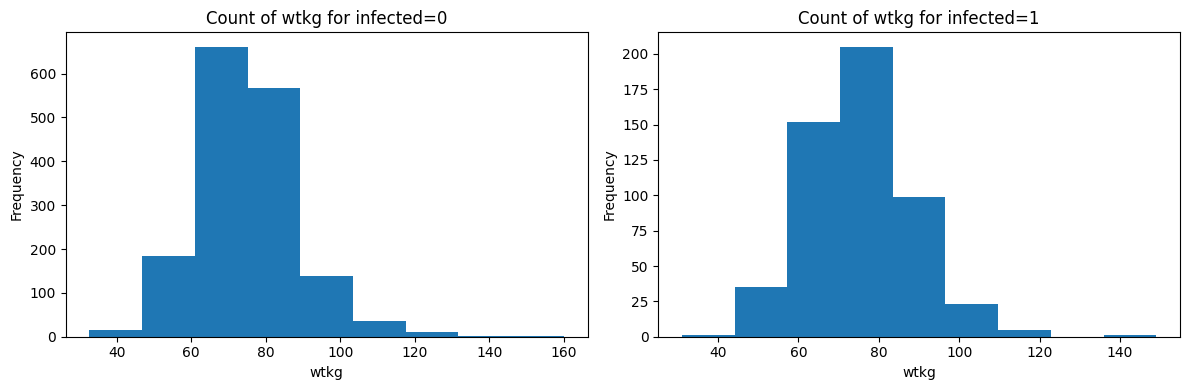

In [48]:
plot_by_infected(df, 'wtkg', True, 9)

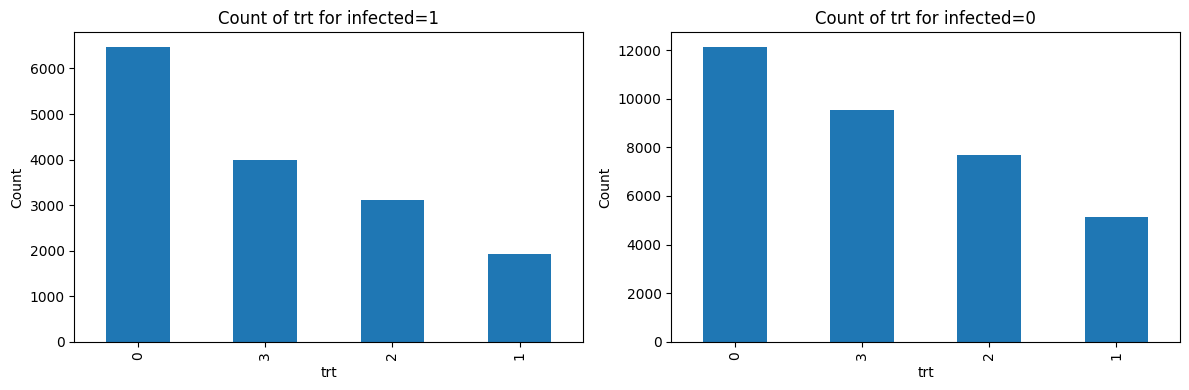

In [12]:
plot_by_infected(df, 'trt')

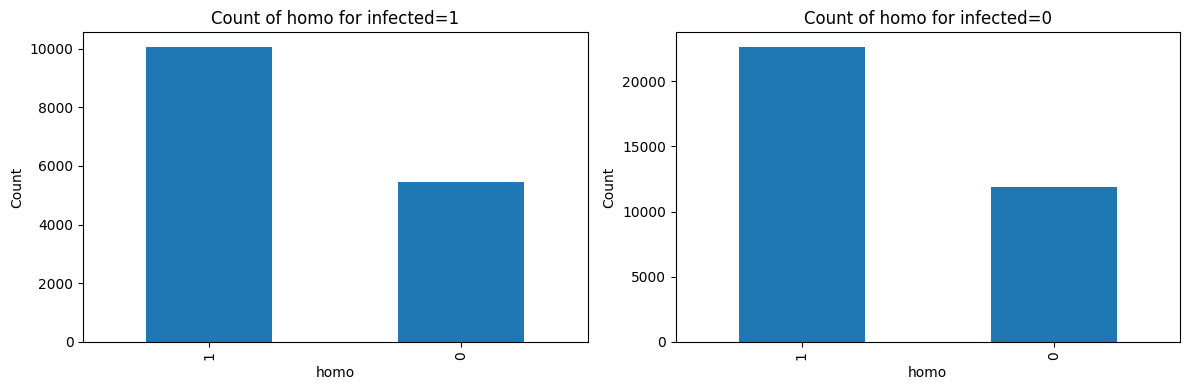

In [13]:
plot_by_infected(df, 'homo')

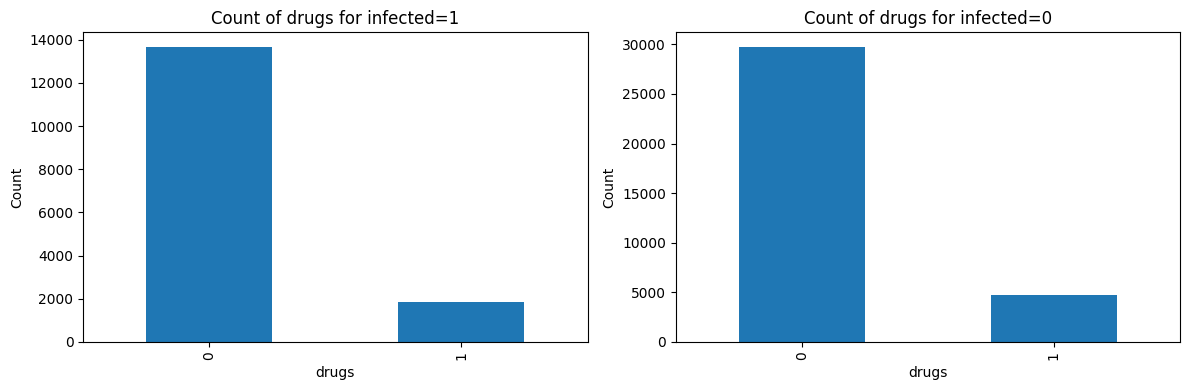

In [14]:
plot_by_infected(df, 'drugs')

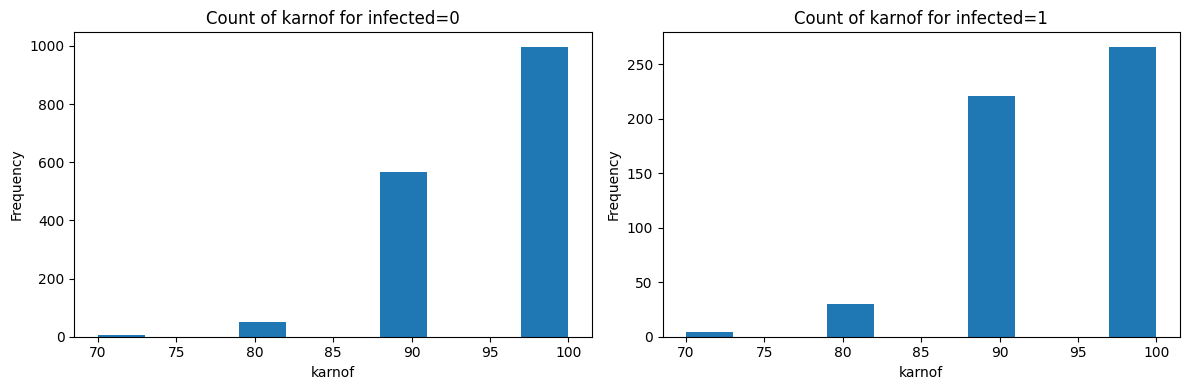

In [42]:
plot_by_infected(df, 'karnof', True, 10)

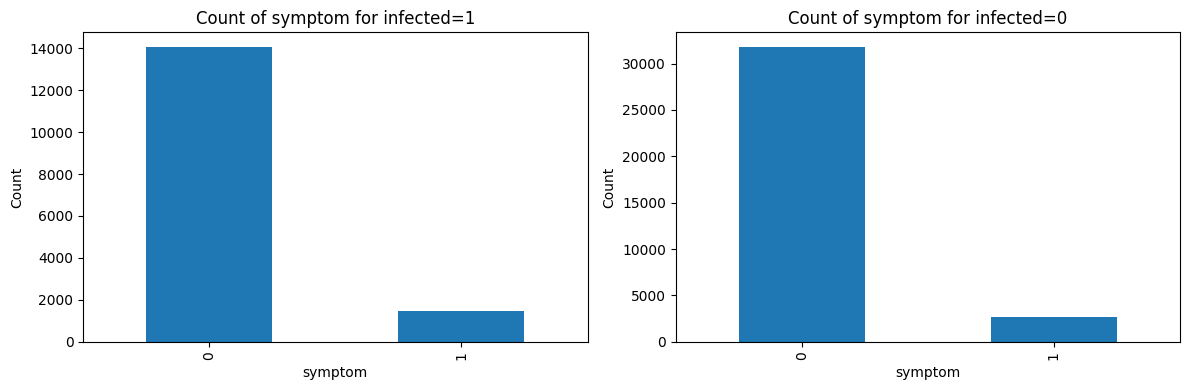

In [16]:
plot_by_infected(df, 'symptom')

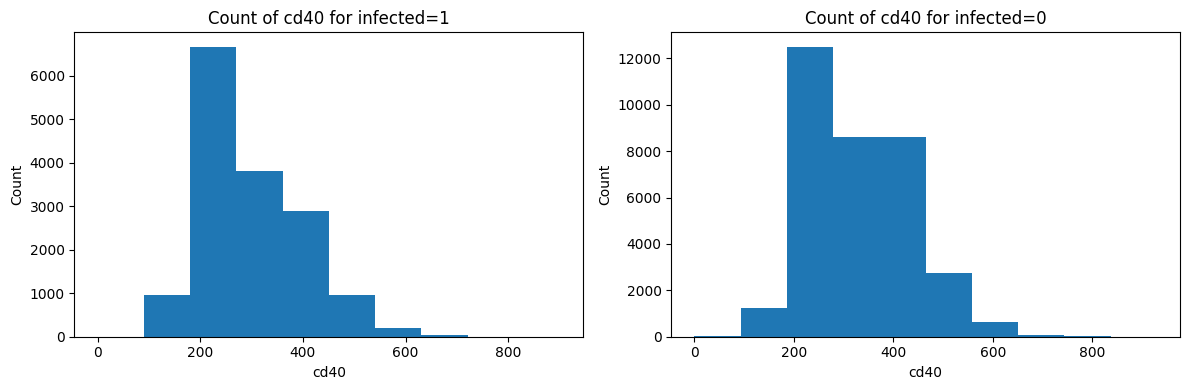

In [18]:
plot_by_infected(df, 'cd40', True)

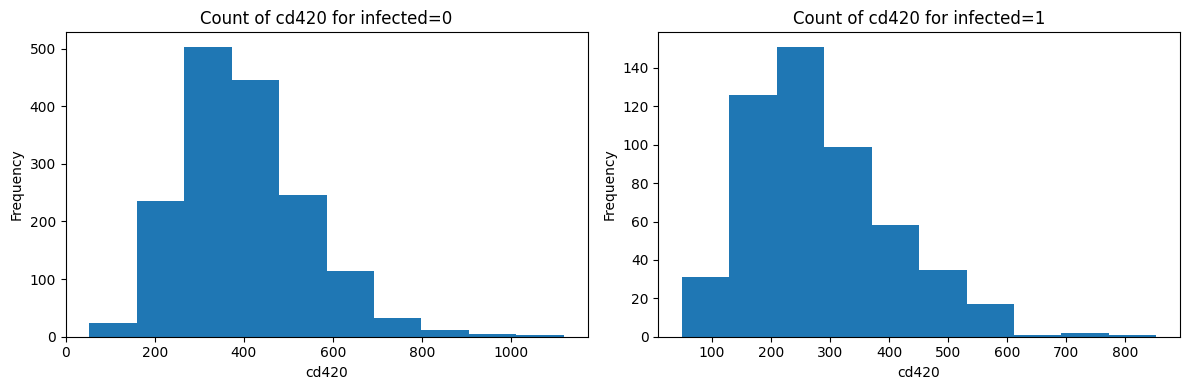

In [27]:
plot_by_infected(df, 'cd420', True)

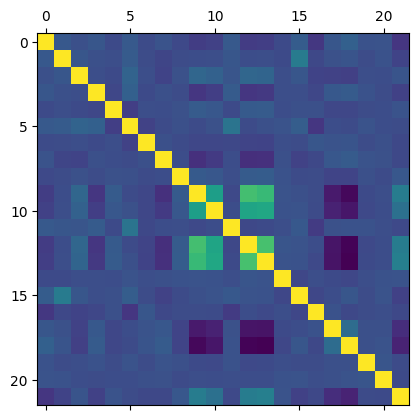